## 두 과제를 "ML_과제_(이름).ipynb" 의 파일명으로 제출해 주세요!


### 과제1
비지도 학습의 목적인 Grouping에 대해 자세히 설명해 주세요! Dataset을 Grouping한다는 것이 무슨 의미인지 간단히 서술해 주시고,

세션에서 언급되었던 Grouping을 위한 두 수단에 대해서 예시 모델을 제시하여 설명해 주시면 됩니다! 예시 모델의 종류에 대해서는 구글링을 통해 조사할 수 있겠습니다.

### 비지도 학습 Grouping은 
데이터셋에서 유사한 패턴, 특성을 갖는 데이터끼리 그룹을 지어주는 것을 말합니다. 
그룹핑은 주로 군집화, 차원축소라고도 불립니다. 

### 군집화 예시 모델
- K-means 클러스터링은 데이터를 K개의 클러스터로 묶는 알고리즘으로, 각 클러스터의 중심을 기준으로 가까운 데이터를 할당.
- DBSCAN은 데이터의 밀도를 기준으로 클러스터를 구분하는 알고리즘으로, 밀도가 높은 부분을 클러스터로 묶음. 듬성듬성한 지역은 노이즈로 할당

### 차원축소 예시 모델
- PCA 주성분 분석은 데이터의 분산을 최대한 보존하면서 데이터를 저차원으로 압축하는 방식으로, 데이터의 분산이 가장 큰 방향을 찾아 이를 주성분이라고 함.
- t-SNE는 고차원의 데이터를 저차원으로 압축하는 방식으로, 고차원에서의 t분포를 저차원에서도 유지하도록 변환.

### 과제2
드라이브에 첨부된 diabetes.csv 파일을 이용해, decision tree를 이용한 classifier model을 디자인해 주세요!

분류 문제에 맞는 (간단한 수준의) 데이터 전처리 및 Feature selection이 선행되어야 합니다.

모델의 성능은 상관 없지만, 모델 구동 결과 및 평가지표의 출력은 정상적으로 이루어져야 합니다! 평가지표의 종류 또한 상관 없습니다.

데이터셋에 대한 설명은 아래 캐클 링크를 참조해 주세요!
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

과제 진행에 있어 어려움을 겪으신다면 아래 링크의 내용을 참조하시면 됩니다!
https://www.datacamp.com/tutorial/decision-tree-classification-python


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/daniel/Downloads/0118 ML/실습 및 과제 데이터셋/diabetes.csv')

In [25]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [27]:
# 필요한 라이브러리 임포트
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

# 예제 데이터 생성 (실제 데이터에 따라 수정 필요)
# 예제 데이터가 없는 경우에는 실제 데이터에 맞게 수정이 필요합니다.
# X와 y는 각각 특성과 타겟 변수에 해당하는 데이터를 담은 변수입니다.
# X, y를 실제 데이터에 맞게 수정하여 사용하세요.
# 예를 들어, pandas DataFrame을 사용한다면 X = df.drop('Outcome', axis=1), y = df['Outcome']와 같이 사용할 수 있습니다.
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 데이터를 학습 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree 모델 생성
model = DecisionTreeClassifier(random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# F1 Score 평가
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# 분류 보고서 출력 (정밀도, 재현율, F1 Score 등 포함)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7468
F1 Score: 0.6723
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [28]:
df.describe(include='all')
# 범주형 인코딩은 필요 없음. 
# 1 Pregnancies가 최댓값 17? 이상치 일 것 같다는 느낌
# 2 Glucose, BloodPressure, SkinThickness, Insulin, BMI가 최솟값 0? 이상치 일 것 같다는 느낌

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [38]:
print(df['Outcome'].value_counts())
#print(df['Pregnancies'].value_counts())#  -> 이건 뭐 어쩔 수 없지
print('Glucose',df[df['Glucose'] == 0].shape)
print('BloodPressure',df[df['BloodPressure'] == 0].shape)
print('SkinThickness', df[df['SkinThickness'] == 0].shape)
print('Insulin', df[df['Insulin'] == 0].shape)
print('BMI', df[df['BMI'] == 0].shape)

# BloodPressure, Glucose, BMI 정도는 0, 평균으로 대체한다고 쳐도, Insulin, SkinThickness는 너무 많다. 
# 일단 시각화해서 목표 변수와 연관이 있는지 확인.
# Glucose, BMI, BloodPressure는 dropna 진행. 
df.drop(df[df['Glucose'] == 0].index, inplace=True)
df.drop(df[df['BMI'] == 0].index, inplace=True)
df.drop(df[df['BloodPressure'] == 0].index, inplace=True)

Outcome
0    500
1    268
Name: count, dtype: int64
Glucose (5, 9)
BloodPressure (35, 9)
SkinThickness (227, 9)
Insulin (374, 9)
BMI (11, 9)


In [39]:
# 삭제 체크
print(df['Outcome'].value_counts())
#print(df['Pregnancies'].value_counts())#  -> 이건 뭐 어쩔 수 없지
print('Glucose',df[df['Glucose'] == 0].shape)
print('BloodPressure',df[df['BloodPressure'] == 0].shape)
print('SkinThickness', df[df['SkinThickness'] == 0].shape)
print('Insulin', df[df['Insulin'] == 0].shape)
print('BMI', df[df['BMI'] == 0].shape)

Outcome
0    475
1    249
Name: count, dtype: int64
Glucose (0, 9)
BloodPressure (0, 9)
SkinThickness (192, 9)
Insulin (332, 9)
BMI (0, 9)


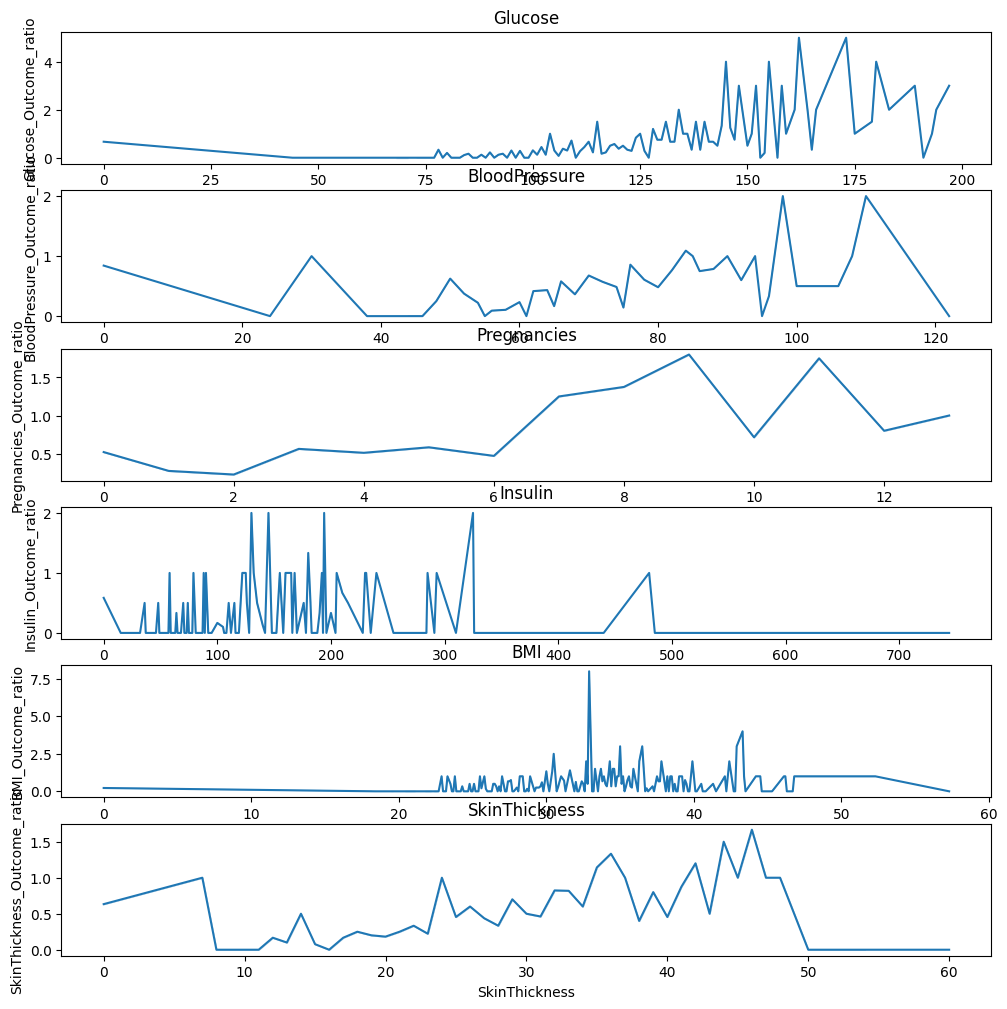

In [21]:
import seaborn as sns
columns_of_interest = ['Glucose', 'BloodPressure', 'Pregnancies', 'Insulin', 'BMI', 'SkinThickness']  # 분석할 변수들 선택
for column in columns_of_interest:
    ratio_column_name = f"{column}_Outcome_ratio"
    ratio_series = df.groupby(column)['Outcome'].value_counts(normalize=True).unstack().fillna(0).loc[:, 1] / df.groupby(column)['Outcome'].value_counts(normalize=True).unstack().fillna(0).loc[:, 0]
    df[ratio_column_name] = df[column].map(ratio_series)

# 서브플롯 생성
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(12, 12))  # 3행 2열의 서브플롯 배열

for i, column in enumerate(columns_of_interest):
    sns.lineplot(x=column, y=f"{column}_Outcome_ratio", data=df, ax=axes[i])
    axes[i].set_title(column)

BMI가 크게 영향이 있어보이진 않지만...일단 나머지들은 다 평균으로 0값 대체
해보고 노이즈가 심한 BMI 제거 시도

In [40]:
df['Insulin'][df['Insulin'] == 0] = df['Insulin'].mean()
df['SkinThickness'][df['SkinThickness'] == 0] = df['SkinThickness'].mean()

/var/folders/bz/05qb09453nn21vlxt_xbdzrm0000gn/T/ipykernel_7611/3959617239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Insulin'][df['Insulin'] == 0] = df['Insulin'].mean()
/var/folders/bz/05qb09453nn21vlxt_xbdzrm0000gn/T/ipykernel_7611/3959617239.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '84.49447513812154' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df['Insulin'][df['Insulin'] == 0] = df['Insulin'].mean()
/var/folders/bz/05qb09453nn21vlxt_xbdzrm0000gn/T/ipykernel_7611/3959617239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [41]:
print('SkinThickness', df[df['SkinThickness'] == 0].shape)
print('Insulin', df[df['Insulin'] == 0].shape)
# 잘 변환되었음. 

SkinThickness (0, 9)
Insulin (0, 9)


In [44]:
# 다시 처음부터 train , test split 하기. 
# 필요한 라이브러리 임포트
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

df = pd.read_csv('/Users/daniel/Downloads/0118 ML/실습 및 과제 데이터셋/diabetes.csv')
df.drop(df[df['Glucose'] == 0].index, inplace=True)
df.drop(df[df['BMI'] == 0].index, inplace=True)
df.drop(df[df['BloodPressure'] == 0].index, inplace=True)

#test 값은 오류 없는 값을 사용. 
non_zero_df = df[(df['Insulin'] != 0) & (df['SkinThickness'] != 0)]
random_sample_df = non_zero_df.sample(n=100, random_state=42)
y_test = random_sample_df['Outcome']
X_test = random_sample_df.drop('Outcome', axis=1)

df_new = df[~df.index.isin(random_sample_df.index)]
df_new[df_new['Insulin'] == 0]['Insulin'] = df_new['Insulin'].mean()
df_new[df_new['SkinThickness'] == 0]['SkinThickness'] = df_new['SkinThickness'].mean()
X_train = df_new.drop('Outcome', axis=1)
y_train = df_new['Outcome']


 


/var/folders/bz/05qb09453nn21vlxt_xbdzrm0000gn/T/ipykernel_7611/3345950188.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[df_new['Insulin'] == 0]['Insulin'] = df_new['Insulin'].mean()
/var/folders/bz/05qb09453nn21vlxt_xbdzrm0000gn/T/ipykernel_7611/3345950188.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[df_new['SkinThickness'] == 0]['SkinThickness'] = df_new['SkinThickness'].mean()


In [45]:
# Decision Tree 모델 생성
model = DecisionTreeClassifier(random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# F1 Score 평가
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# 분류 보고서 출력 (정밀도, 재현율, F1 Score 등 포함)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy는 상승, but, F1 Score는 하락. 
# 그냥 0인 컬럼들 삭제, 양이 적었던 glucose, bmi, bloodpressure만 살려볼까

Accuracy: 0.7600
F1 Score: 0.6129
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        68
           1       0.63      0.59      0.61        32

    accuracy                           0.76       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.76      0.76      0.76       100



In [47]:
# 다시 처음부터 train , test split 하기. 
# 필요한 라이브러리 임포트
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

df = pd.read_csv('/Users/daniel/Downloads/0118 ML/실습 및 과제 데이터셋/diabetes.csv')
df.drop(df[df['Glucose'] == 0].index, inplace=True)
df.drop(df[df['BMI'] == 0].index, inplace=True)
df.drop(df[df['BloodPressure'] == 0].index, inplace=True)


df.drop(['Insulin', 'SkinThickness'], axis=1, inplace=True)

X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 데이터를 학습 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree 모델 생성
model = DecisionTreeClassifier(random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# F1 Score 평가
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# 분류 보고서 출력 (정밀도, 재현율, F1 Score 등 포함)
print("Classification Report:")
print(classification_report(y_test, y_pred))


 


Accuracy: 0.7655
F1 Score: 0.6531
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.58      0.74      0.65        43

    accuracy                           0.77       145
   macro avg       0.73      0.76      0.74       145
weighted avg       0.79      0.77      0.77       145

